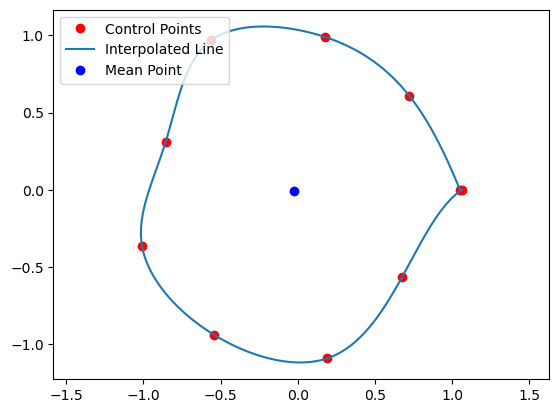

At theta = 0.5, (x, y) = (0.8305686047984339, 0.453731546830131)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#データの作成
theta = np.linspace(0, 2*np.pi, 10)
r = np.ones_like(theta) + np.random.normal(0, 0.1, len(theta))  #すべての要素を1にして、ランダム性を加える

# デカルト座標系への変換
x = r * np.cos(theta)
y = r * np.sin(theta)

# スプライン補間（xとyを別々に補間）
f_x = interp1d(theta, x, kind='cubic')
f_y = interp1d(theta, y, kind='cubic')
theta_new = np.linspace(0, 2*np.pi, 1000)
x_interp = f_x(theta_new)
y_interp = f_y(theta_new)

# 平均(重心?)を求める
x_mean = np.mean(x_interp)
y_mean = np.mean(y_interp)

# プロット
plt.plot(x, y, 'ro', label="Control Points")
plt.plot(x_interp, y_interp, label="Interpolated Line")
plt.plot(x_mean, y_mean, 'bo', label="Mean Point")
plt.axis('equal')
plt.legend(loc='upper left')
plt.savefig("file1.png")
plt.show()

#特定のthetaに対応する輪郭のx,y座標を取得する部分
theta_value = 0.5
x_interp_value = f_x(theta_value)
y_interp_value = f_y(theta_value)
print(f"At theta = {theta_value}, (x, y) = ({x_interp_value}, {y_interp_value})")



x is[3, 1, 0, -1, -3, -1, 0, 1, 3, 1, 0, -1, -3]
y is[0, 1, 3, 1, 0, -1, -3, -1, 0, 1, 3, 1, 0]


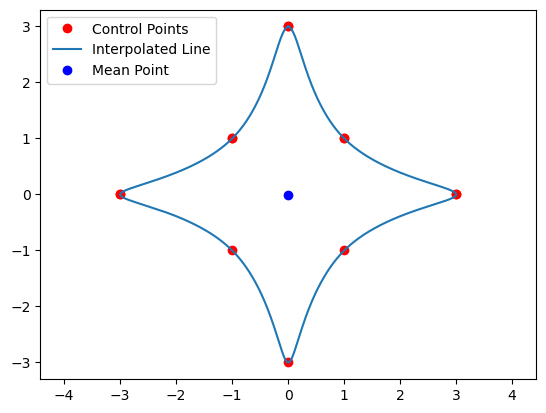

At theta = 0.5, (x, y) = (1.5927324690579334, 0.0970822522980214)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = [3,1,0,-1,-3,-1,0,1,3]
y = [0,1,3,1,0,-1,-3,-1,0]
#曲率を一致させるために2週目の点を追加。
for i in range(1,5):
    x.append(x[i])
    y.append(y[i])


r = []
theta = []
#arctan()の返り値を0~2πにして、超えた分はθ+2πとして記録する
first_try = True
second_loop = False
for i in range(len(x)):
    r.append(np.sqrt(x[i] ** 2 + y[i] ** 2))
    theta_check = np.arctan2(y[i],x[i])
    if theta_check > 0 and second_loop == False:
        theta.append(theta_check)
    elif theta_check < 0 and second_loop == False:
        theta.append(2*np.pi+theta_check)
    elif theta_check == 0 and first_try == True:
        theta.append(0)
        first_try = False
    elif theta_check == 0 and first_try == False:
        theta.append(2*np.pi)
        second_loop = True
    if theta_check > 0 and second_loop == True:
        theta.append(theta_check + 2*np.pi)
    elif theta_check < 0 and second_loop == True:
        theta.append(2*np.pi+theta_check + 2*np.pi)

# スプライン補間（xとyを別々に補間）
f_x = interp1d(theta, x, kind='cubic')
f_y = interp1d(theta, y, kind='cubic')

#大量のthetaを作成。これを描画のための入力にする。
theta_new = np.linspace(0, 2*np.pi, 1000)
#描画の始点をtheta[1]分ずらす。
theta_new += theta[2]
x_interp = f_x(theta_new)
y_interp = f_y(theta_new)

# 平均(重心?)を求める
x_mean = np.mean(x_interp)
y_mean = np.mean(y_interp)

# プロット
plt.plot(x, y, 'ro', label="Control Points")
plt.plot(x_interp, y_interp, label="Interpolated Line")
plt.plot(x_mean, y_mean, 'bo', label="Mean Point")
plt.axis('equal')
plt.legend(loc='upper left')
plt.savefig("file1.png")
plt.show()

#特定のthetaに対応する輪郭のx,y座標を取得する部分
theta_value = 0.5
x_interp_value = f_x(theta_value)
y_interp_value = f_y(theta_value)
print(f"At theta = {theta_value}, (x, y) = ({x_interp_value}, {y_interp_value})")